<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/ANN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

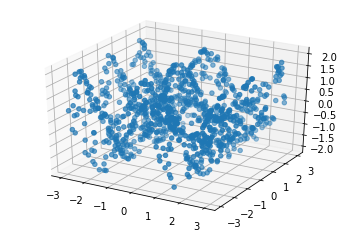

In [4]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [9]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

In [10]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer = opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0076
Epoch 2/100
32/32 [==============================] - 0s 916us/step - loss: 0.9832
Epoch 3/100
32/32 [==============================] - 0s 901us/step - loss: 0.9457
Epoch 4/100
32/32 [==============================] - 0s 897us/step - loss: 0.9306
Epoch 5/100
32/32 [==============================] - 0s 969us/step - loss: 0.8842
Epoch 6/100
32/32 [==============================] - 0s 876us/step - loss: 0.8320
Epoch 7/100
32/32 [==============================] - 0s 883us/step - loss: 0.7633
Epoch 8/100
32/32 [==============================] - 0s 919us/step - loss: 0.7067
Epoch 9/100
32/32 [==============================] - 0s 911us/step - loss: 0.6313
Epoch 10/100
32/32 [==============================] - 0s 913us/step - loss: 0.5882
Epoch 11/100
32/32 [==============================] - 0s 938us/step - loss: 0.5688
Epoch 12/100
32/32 [==============================] - 0s 908us/step - loss: 0.5349
Epoch 13/100
32

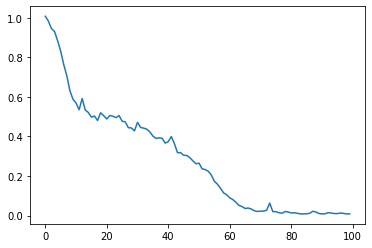

In [11]:
plt.plot(r.history['loss'], label = 'loss')

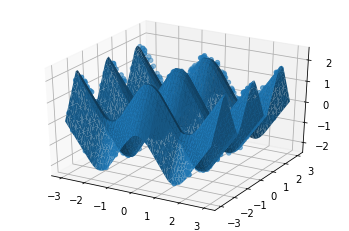

In [13]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

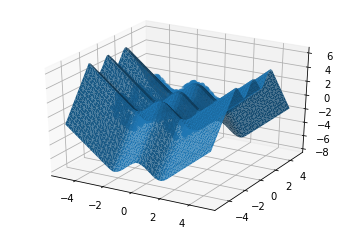

In [14]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()